In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../app')

In [2]:
from data_retrieval import vertical_download, reconstruction, download_indicators, dfs_list_from_dir

import pandas as pd
import eikon as ek

import app_functions as af
import custom_calculations as calcs

### Downloading

In [3]:
instruments_list = ek.get_data('0#.STOXX','TR.RIC')[0].RIC.tolist()

In [4]:
len(instruments_list)

600

In [7]:
#las funciones de eikon a descargar
fields_list = [#'TR.TRESGScore',
               'TR.Volume',
               'TR.EBIT'
               ]
#parametros de la funcion
parameters = {'SDate':'2012-01-01','EDate':'2023-01-01','Frq':'FY','Period':'FY0'}
#directorio en el que guardar los datos
dir_fp = r'C:\Users\hugo.perezdealbeniz\Documents\GitHub\ranking_DIP_european_equities\eikon_data_retrieval\data'

In [6]:
#only ESGScore
data_dict = download_indicators(fields_list,instruments_list,parameters,dir_fp)

  7%|▋         | 41/600 [00:32<07:17,  1.28it/s]2023-05-04 09:33:58,382 P[13844] [MainThread 18076] Backend error. 400 Bad Request
2023-05-04 09:33:58.382 ERROR   pyeikon: Backend error. 400 Bad Request
2023-05-04 09:33:58,384 P[13844] [MainThread 18076] HTTP request failed: EikonError-Backend error. 400 Bad Request
2023-05-04 09:33:58.384 ERROR   pyeikon: HTTP request failed: EikonError-Backend error. 400 Bad Request
  8%|▊         | 45/600 [00:53<24:12,  2.62s/it]2023-05-04 09:34:19,285 P[13844] [MainThread 18076] Backend error. 400 Bad Request
2023-05-04 09:34:19.285 ERROR   pyeikon: Backend error. 400 Bad Request
2023-05-04 09:34:19,287 P[13844] [MainThread 18076] HTTP request failed: EikonError-Backend error. 400 Bad Request
2023-05-04 09:34:19.287 ERROR   pyeikon: HTTP request failed: EikonError-Backend error. 400 Bad Request
100%|██████████| 600/600 [06:58<00:00,  1.43it/s] 


In [8]:
#Volume and EBIT
new_dict = download_indicators(fields_list,instruments_list,parameters,dir_fp)

  3%|▎         | 19/600 [00:09<04:52,  1.98it/s]2023-05-04 09:40:33,102 P[13844] [MainThread 18076] Receive ticket from responses, wait for 15.0 seconds
2023-05-04 09:40:33.102 INFO    pyeikon: Receive ticket from responses, wait for 15.0 seconds
  4%|▎         | 22/600 [00:39<44:45,  4.65s/it]  2023-05-04 09:41:07,723 P[13844] [MainThread 18076] Backend error. 400 Bad Request
2023-05-04 09:41:07.723 ERROR   pyeikon: Backend error. 400 Bad Request
2023-05-04 09:41:07,726 P[13844] [MainThread 18076] HTTP request failed: EikonError-Backend error. 400 Bad Request
2023-05-04 09:41:07.726 ERROR   pyeikon: HTTP request failed: EikonError-Backend error. 400 Bad Request
  4%|▍         | 24/600 [00:57<59:56,  6.24s/it]  2023-05-04 09:41:26,395 P[13844] [MainThread 18076] Backend error. 400 Bad Request
2023-05-04 09:41:26.395 ERROR   pyeikon: Backend error. 400 Bad Request
2023-05-04 09:41:26,397 P[13844] [MainThread 18076] HTTP request failed: EikonError-Backend error. 400 Bad Request
2023-05-0

 60%|██████    | 363/600 [06:06<03:12,  1.23it/s]2023-05-04 09:53:32,602 P[13844] [MainThread 18076] Receive ticket from responses, wait for 15.0 seconds
2023-05-04 09:53:32.602 INFO    pyeikon: Receive ticket from responses, wait for 15.0 seconds
 61%|██████▏   | 368/600 [06:37<10:35,  2.74s/it]2023-05-04 09:54:09,797 P[13844] [MainThread 18076] Backend error. 400 Bad Request
2023-05-04 09:54:09.797 ERROR   pyeikon: Backend error. 400 Bad Request
2023-05-04 09:54:09,802 P[13844] [MainThread 18076] HTTP request failed: EikonError-Backend error. 400 Bad Request
2023-05-04 09:54:09.802 ERROR   pyeikon: HTTP request failed: EikonError-Backend error. 400 Bad Request
 63%|██████▎   | 376/600 [07:01<04:57,  1.33s/it]2023-05-04 09:54:33,653 P[13844] [MainThread 18076] Backend error. 400 Bad Request
2023-05-04 09:54:33.653 ERROR   pyeikon: Backend error. 400 Bad Request
2023-05-04 09:54:33,657 P[13844] [MainThread 18076] HTTP request failed: EikonError-Backend error. 400 Bad Request
2023-05-04

In [14]:
new_dict.keys()

dict_keys(['Volume', 'EBIT'])

In [15]:
data_dict.update(new_dict)

In [16]:
data_dict.keys()

dict_keys(['TRESGScore', 'Volume', 'EBIT'])

### Calculations and ranking

In [43]:
n_quantiles = 10

In [17]:
esg_df = data_dict['TRESGScore']
volume_df = data_dict['Volume']
ebit_df = data_dict['EBIT']

<AxesSubplot: >

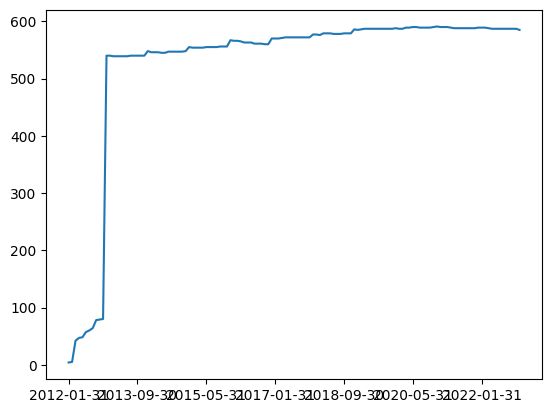

In [20]:
#ebit_df.notna().sum(axis=1).plot()

In [34]:
volume_df

,1COV.DE,A2.MI,AAK.ST,AAL.L,AALB.AS,ABBN.S,ABDN.L,ABF.L,ABI.BR,ABNd.AS,...,WISEa.L,WLN.PA,WLSNc.AS,WOSG.L,WPP.L,WRT1V.HE,WTB.L,YAR.OL,ZALG.DE,ZURN.S
2012-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,0,0,0,657335,28209,0,1003482,152160,289084,362368,...,1077746,139497,108913,162818,830666,0,127643,0,0,0
2022-09-30,0,0,0,657335,28209,0,1003482,152160,289084,362368,...,1077746,139497,108913,162818,830666,0,127643,0,0,0
2022-10-31,0,0,0,657335,28209,0,1003482,152160,289084,362368,...,1077746,139497,108913,162818,830666,0,127643,0,0,0
2022-11-30,0,0,0,657335,28209,0,1003482,152160,289084,362368,...,1077746,139497,108913,162818,830666,0,127643,0,0,0


In [40]:
calc1 = calcs.exponential_ma(volume_df.apply(pd.to_numeric),13)

In [52]:
calc2 = calcs.simple_ma(ebit_df.apply(pd.to_numeric),4)

In [53]:
calcs.rsi(esg_df,4)

,1COV.DE,A2.MI,AAK.ST,AAL.L,AALB.AS,ABBN.S,ABDN.L,ABF.L,ABI.BR,ABNd.AS,...,WISEa.L,WLN.PA,WLSNc.AS,WOSG.L,WPP.L,WRT1V.HE,WTB.L,YAR.OL,ZALG.DE,ZURN.S
2012-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-30,100.0,100.000000,100.0,100.000000,100.0,100.000000,100.00000,100.0,100.000000,100.000000,...,100.0,100.000000,100.000000,100.0,100.0,100.000000,100.0,100.000000,100.000000,100.000000
2012-05-31,100.0,100.000000,100.0,100.000000,100.0,100.000000,100.00000,100.0,100.000000,100.000000,...,100.0,100.000000,100.000000,100.0,100.0,100.000000,100.0,100.000000,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,100.0,0.499259,100.0,98.655883,100.0,99.999987,99.99245,100.0,99.999997,99.610909,...,100.0,99.976404,96.444678,100.0,100.0,2.915783,100.0,99.877364,99.999164,99.999957
2022-09-30,100.0,0.499259,100.0,98.655883,100.0,99.999987,99.99245,100.0,99.999997,99.610909,...,100.0,99.976404,96.444678,100.0,100.0,2.915783,100.0,99.877364,99.999164,99.999957
2022-10-31,100.0,0.499259,100.0,98.655883,100.0,99.999987,99.99245,100.0,99.999997,99.610909,...,100.0,99.976404,96.444678,100.0,100.0,2.915783,100.0,99.877364,99.999164,99.999957
2022-11-30,100.0,0.499259,100.0,98.655883,100.0,99.999987,99.99245,100.0,99.999997,99.610909,...,100.0,99.976404,96.444678,100.0,100.0,2.915783,100.0,99.877364,99.999164,99.999957


In [54]:
custom_calc_df = calc1*calc2/calcs.rsi(esg_df,4)

In [55]:
custom_calc_df

,1COV.DE,A2.MI,AAK.ST,AAL.L,AALB.AS,ABBN.S,ABDN.L,ABF.L,ABI.BR,ABNd.AS,...,WISEa.L,WLN.PA,WLSNc.AS,WOSG.L,WPP.L,WRT1V.HE,WTB.L,YAR.OL,ZALG.DE,ZURN.S
2012-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,0.0,0.0,0.0,1.335596e+14,1.585879e+11,0.0,2.848334e+12,NaN,4.557651e+13,2.434001e+13,...,4.778799e+11,6.092199e+11,1.341910e+12,NaN,1.204038e+13,0.0,NaN,0.0,0.0,0.0
2022-09-30,0.0,0.0,0.0,1.309418e+14,1.563276e+11,0.0,2.795541e+12,NaN,4.505540e+13,2.284808e+13,...,5.006039e+11,6.095741e+11,1.327506e+12,NaN,1.202509e+13,0.0,NaN,0.0,0.0,0.0
2022-10-31,0.0,0.0,0.0,1.286980e+14,1.543902e+11,0.0,2.750291e+12,NaN,4.460873e+13,2.156929e+13,...,5.200816e+11,6.098777e+11,1.315159e+12,NaN,1.201198e+13,0.0,NaN,0.0,0.0,0.0
2022-11-30,0.0,0.0,0.0,1.267747e+14,1.527295e+11,0.0,2.711505e+12,NaN,4.422588e+13,2.047318e+13,...,5.367768e+11,6.101379e+11,1.304576e+12,NaN,1.200075e+13,0.0,NaN,0.0,0.0,0.0


In [57]:
ranks = af.rank_data(custom_calc_df,n_quantiles,'high').iloc[-1,:]

Failed to rank:
 [3, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


In [63]:
custom_calc_df.shape

(132, 599)

In [59]:
ranks.loc[ranks==1]

ASRNL.AS    1.0
AV.L        1.0
BARC.L      1.0
BATS.L      1.0
BP.L        1.0
BT.L        1.0
CABK.MC     1.0
DGE.L       1.0
EDF.PA      1.0
EDP.LS      1.0
GLEN.L      1.0
HSBA.L      1.0
HWDN.L      1.0
IBE.MC      1.0
KGF.L       1.0
LLOY.L      1.0
MNDI.L      1.0
ORAN.PA     1.0
PHG.AS      1.0
REL.L       1.0
RIO.L       1.0
SAN.MC      1.0
SCOR.PA     1.0
SHEL.AS     1.0
SOGN.PA     1.0
TTEF.PA     1.0
ULVR.L      1.0
VOD.L       1.0
Name: 2022-12-31, dtype: float64

### Simple download alternative (directly using the eikon API library)

In [ ]:
import json
with open(r'Z:\Interés Departamental\Model Portfolio\Hugo\pruebas eikon ruben/stoxx600_constituents_list.json','r') as file:
    constituents_list = json.load(file)

In [ ]:
len(constituents_list)

In [ ]:
whole_df,err = ek.get_data(constituents_list,['TR.TRESGScore','TR.TRESGScore.date'],parameters)
whole_df

In [ ]:
whole_clean_df = whole_df.replace(['','NaN',pd.NA]).dropna().drop_duplicates()
whole_pivoted_df = whole_clean_df.pivot(columns='Instrument',index='Date',values='ESG Score')

In [ ]:
#easy download
tmp = whole_pivoted_df.reset_index()
tmp['year'] = tmp['Date'].apply(lambda x:x[:4])
tmp.groupby('year').max().drop(columns='Date').fillna(method='ffill',limit=1).notna().sum(axis=1).plot()